In [1]:
#Naive Bayes - Text Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
#Getting the dataset
from sklearn.datasets import fetch_20newsgroups

In [3]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
#Defining all categories
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#Training and testing data on these categories
train = fetch_20newsgroups(subset='train', categories = categories)

test = fetch_20newsgroups(subset='test',categories = categories)

In [9]:
#Printing out first article in train.data
print(train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [10]:
len(train.data)

11314

In [12]:
#Printing out first article from test data
print(test.data[0])

From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler



In [13]:
len(test.data)

7532

In [19]:
#Tokeninzing the words i.e giving weights to words that are more heavy and give more info(for e.g :- destruction,religion,etc)
from sklearn.feature_extraction.text import TfidfVectorizer #This helps in tokenization
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline #just for pipelining our model in proper format


In [20]:
#Model
model = make_pipeline(TfidfVectorizer(),MultinomialNB())

In [21]:
#Training the model
model.fit(train.data,train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [22]:
#Prediction
labels = model.predict(test.data)

In [23]:
labels

array([ 7, 11,  0, ...,  9,  3, 15], dtype=int64)

Text(95.64, 0.5, 'Predicted Label')

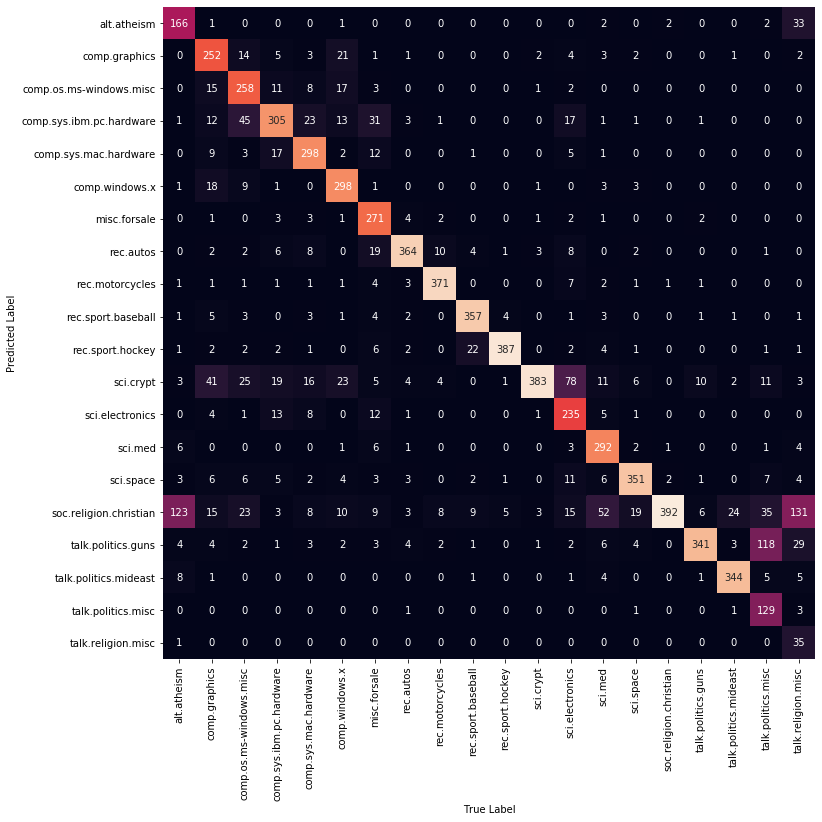

In [28]:
#Evaluation using confusion matrix and heatmap
from sklearn.metrics import confusion_matrix
fig =plt.figure(figsize=(12,12))
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar = False
           ,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [33]:
#Predicting category of some new data using our model
def predict_category(new_data,train = train, model = model):
    pred = model.predict([new_data])
    return train.target_names[pred[0]]

In [38]:
predict_category("Space station")

'sci.space'

In [39]:
predict_category("Cricket")

'comp.graphics'

In [41]:
predict_category("Church")

'soc.religion.christian'